## 2.8

Initial setup

In [1]:
college = read.csv('../input/ISLR-Auto/College.csv', header=TRUE)
rownames(college) = college[, 1]
college = college[, -1]
head(college)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


Using summary to generate a summary of the data in College.csv

In [2]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

Using pairs() to generate pairs charts of College data

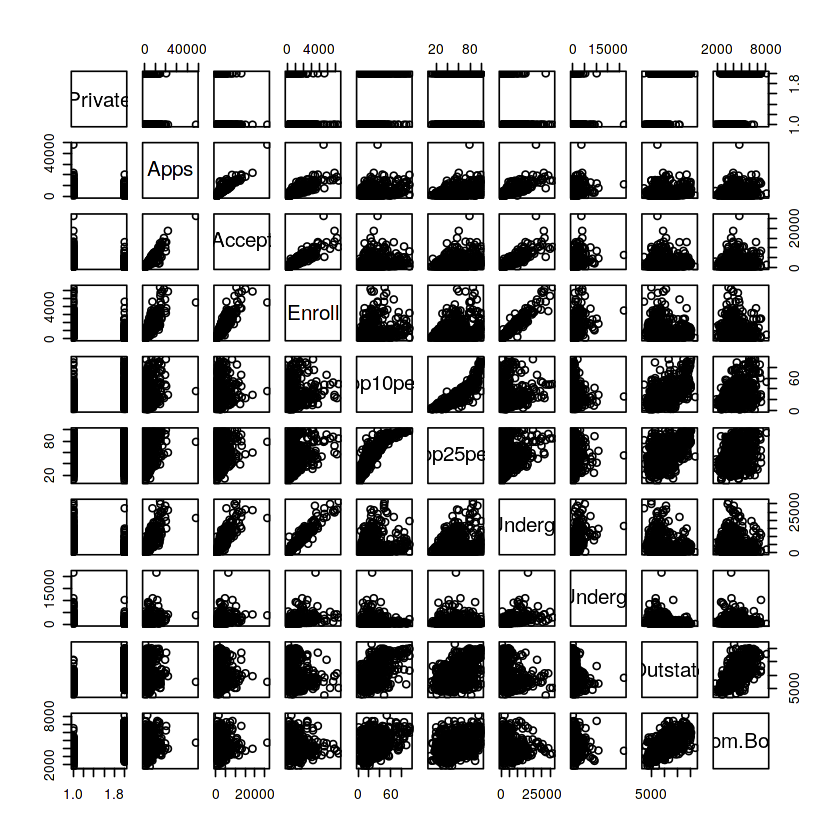

In [3]:
pairs(college[, 1:10])

Using plot() to create a side by side comparison of outstate and private data

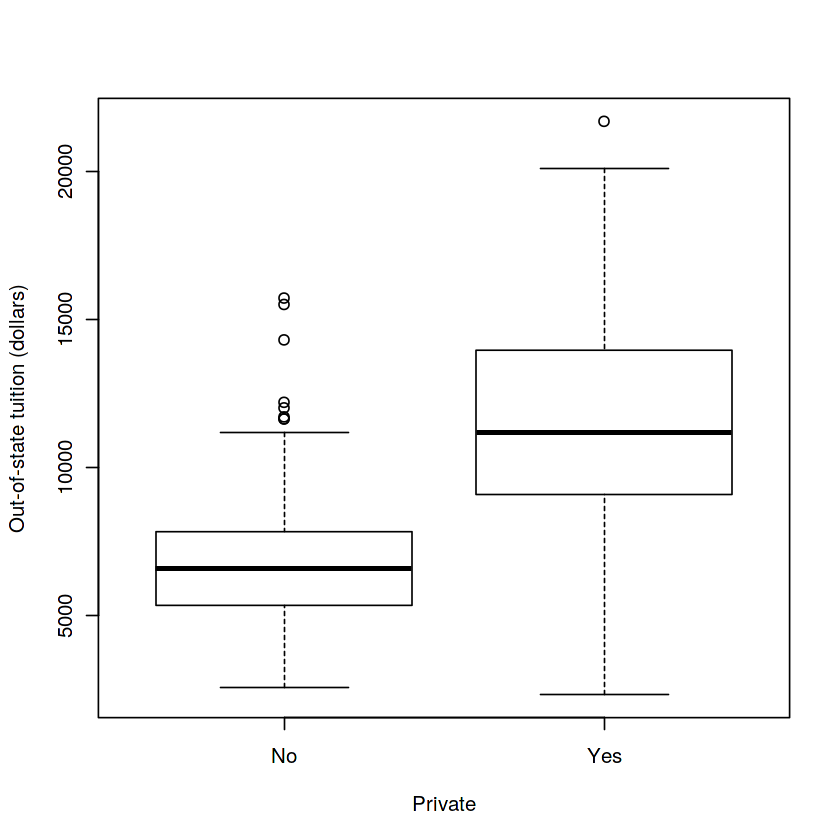

In [4]:
plot(college$Private, college$Outstate, xlab = "Private", ylab = "Out-of-state tuition (dollars)")

Creating "Elite" column variable.

In [5]:
Elite = rep('No', nrow(college))
Elite[college$Top10perc > 50] = "Yes"
Elite = as.factor(Elite)
college = data.frame(college, Elite)

Summarizing new dataset

In [6]:
summary(college)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

Plotting Outstate .vs. Elite

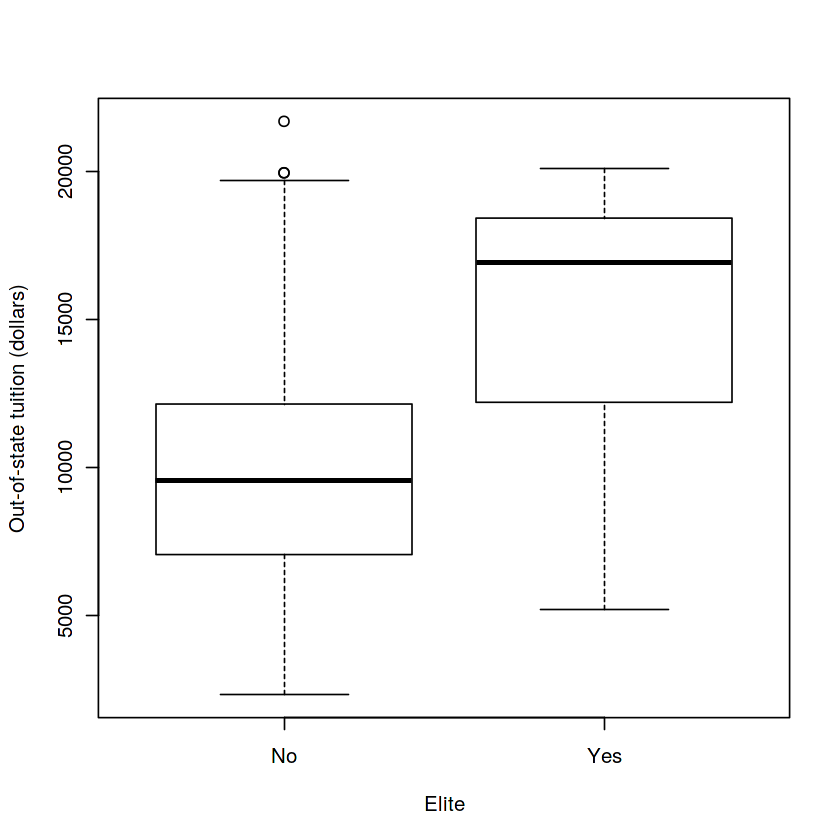

In [7]:
plot(college$Elite, college$Outstate, xlab = "Elite", ylab = "Out-of-state tuition (dollars)")

Creating histograms of data

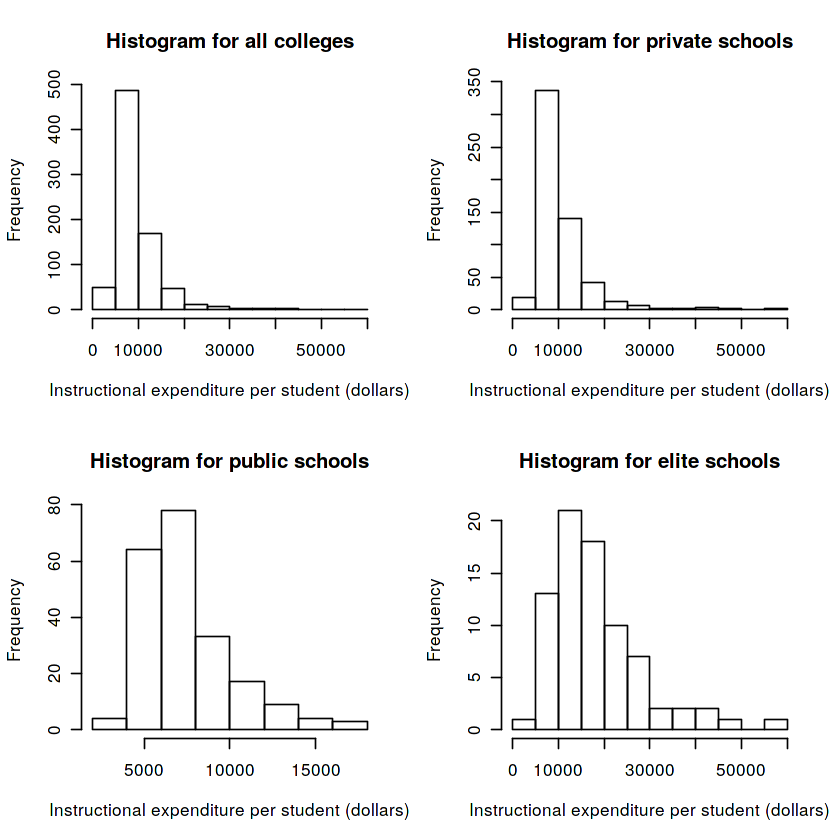

In [8]:
par(mfrow = c(2, 2))
hist(college$Expend, xlab = "Instructional expenditure per student (dollars)", main = "Histogram for all colleges")
hist(college$Expend[college$Private == "Yes"], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for private schools")
hist(college$Expend[college$Private == "No"], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for public schools")
hist(college$Expend[college$Elite == "Yes"], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for elite schools")

Testing more data

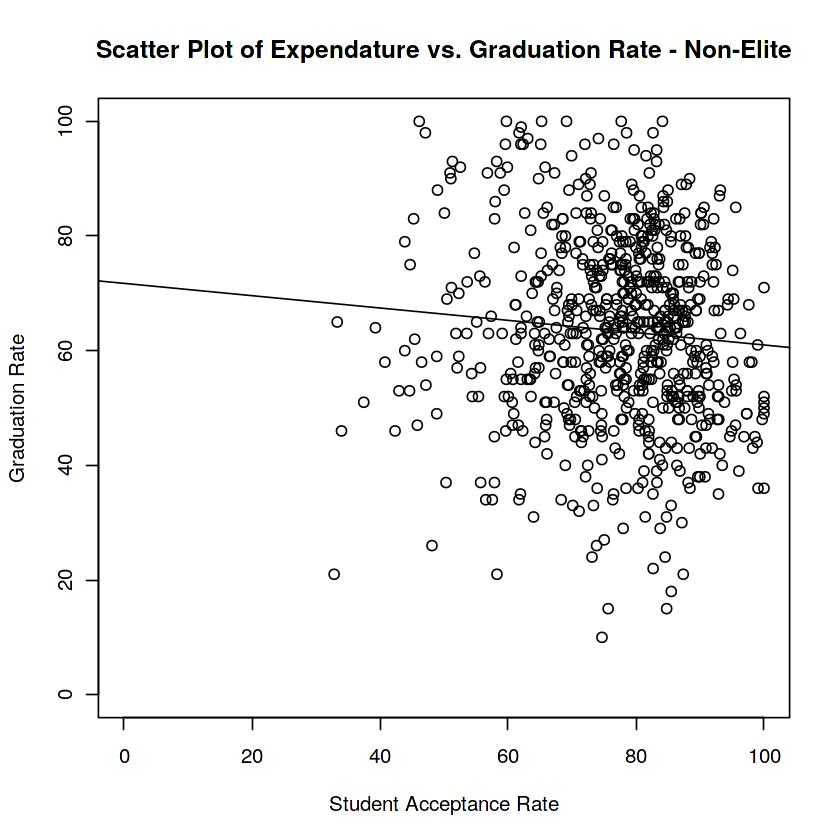

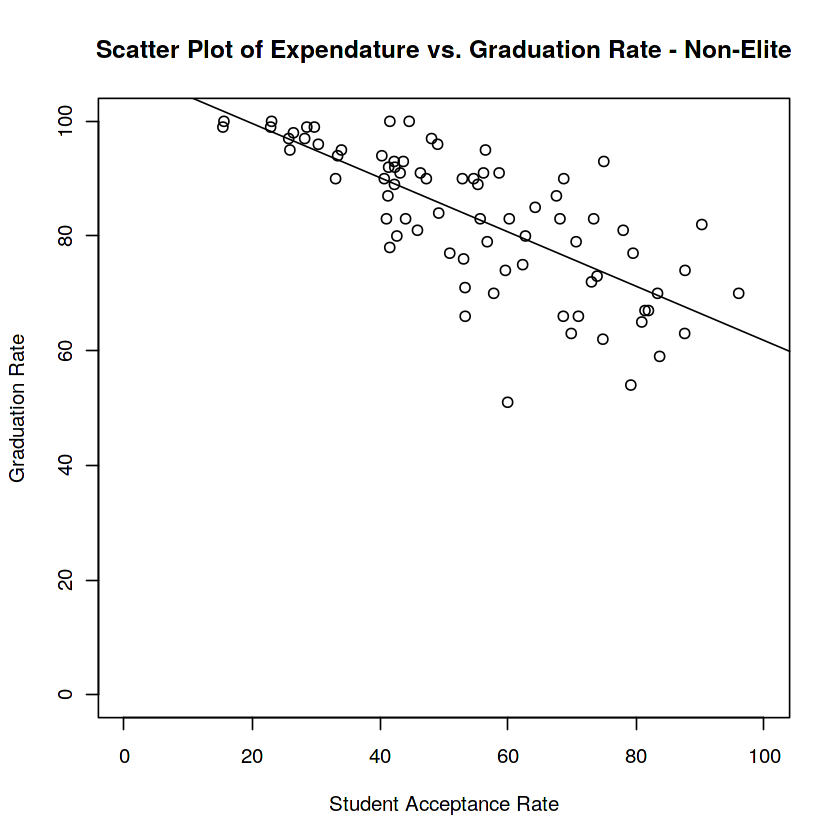

In [9]:
acceptNE = c(college$Accept[college$Elite == "No"]/college$Apps[college$Elite == "No"])*100
gradRateNE = c(college$Grad.Rate[college$Elite == "No"])
plot(acceptNE, gradRateNE, ylim=c(0,100), xlim=c(0,100), xlab="Student Acceptance Rate",ylab="Graduation Rate",pch=1)
abline(lm(gradRateNE ~ acceptNE))
title("Scatter Plot of Expendature vs. Graduation Rate - Non-Elite")

acceptE = c(college$Accept[college$Elite == "Yes"]/college$Apps[college$Elite == "Yes"])*100
gradRateE = c(college$Grad.Rate[college$Elite == "Yes"])
plot(acceptE, gradRateE, ylim=c(0,100), xlim=c(0,100), xlab="Student Acceptance Rate",ylab="Graduation Rate",pch=1)
abline(lm(gradRateE ~ acceptE))
title("Scatter Plot of Expendature vs. Graduation Rate - Non-Elite")

The above chart shows the acceptance rate of college in relation to the graduation rate of students in elite vs non-elite colleges. Overall, there was a consistent trend where colleges that had a lower acceptance rate tended to have higher graduation rates as opposed to cheaper colleges, this is across the board for elite and non-elite schools. However, there seems to be a stronger fit to the lm line between the elite colleges and acceptance rates. Though this test does not answer why this is the case, the answer might be due to a myriad of factors such as cost of the college or rigor of program requirements.

# 2.9

Initial Setup

In [10]:
Auto = read.csv("../input/ISLR-Auto/Auto.csv", header = TRUE, na.strings = "?")
Auto = na.omit(Auto)
dim(Auto)

[1] 392   9

Qualitative predictors are name, origin.
Quantitative predictors are mpg, cylinders, displacement, hp, acceleration, year, and weight.

The following code is the range of each quantitative predictor.

In [11]:
apply(Auto[, 1:7], 2, range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


Next we have the mean and SD for each quantitative predictor. For this I am leaving out year

In [12]:
colMeans(Auto[, 1:7])

mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

As well as the standard deviation for each of the above.

In [13]:
apply(Auto[, 1:7], MARGIN = 2, FUN = "sd")

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

Removing the 10th - 85th obervations and retrying above tests

In [14]:
AutoSubset = Auto[-(10:85)]

Range

In [15]:
apply(AutoSubset[, 1:7], 2, range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


Means

In [16]:
colMeans(AutoSubset[, 1:7])

mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

Standard Deviations

In [17]:
apply(AutoSubset[, 1:7], MARGIN = 2, FUN = "sd")

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

Creating scatter plots of the range, means, and SD of the full dataset.

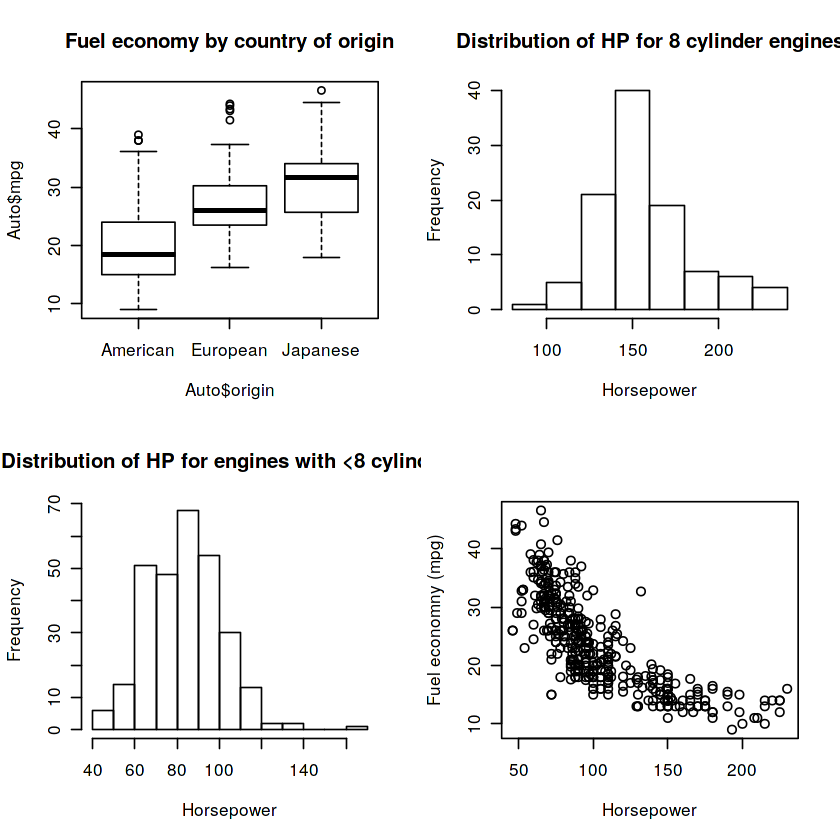

In [18]:
par(mfrow = c(2, 2))
Auto$origin[Auto$origin == 1] = "American"
Auto$origin[Auto$origin == 2] = "European"
Auto$origin[Auto$origin == 3] = "Japanese"
boxplot(Auto$mpg ~ Auto$origin, main="Fuel economy by country of origin")
hist(Auto$horsepower[Auto$cylinders == 8], xlab = "Horsepower", ylab = "Frequency", main="Distribution of HP for 8 cylinder engines")
hist(Auto$horsepower[Auto$cylinders < 8], xlab = "Horsepower", ylab = "Frequency", main="Distribution of HP for engines with <8 cylinders")
plot(Auto$horsepower, Auto$mpg, xlab = "Horsepower", ylab = "Fuel economny (mpg)")

The above charts give us some information about the vehicles when comparing their qualities. The first chart is a boxchart comparison of vehicle fuel economy compared to the country of origin. This shows that on average Japanese and European vehicles have better fuel economy than American.

The next two charts are comparisons of the distributions of horsepower between engines with 8 cylinders and engines with <8 cylinders. Overall the 8 cylinder engines have significantly higher HP at the height of the distribution than the <8 cylinder engines.

Finally, we have a plot comparing horsepower to fuel economy, we can see there is a correlation where as we increase horsepower we lose fuel efficency. The largest decrease seems to be between 50-100 HP which tapers off as we get into the larger ranges of HP.

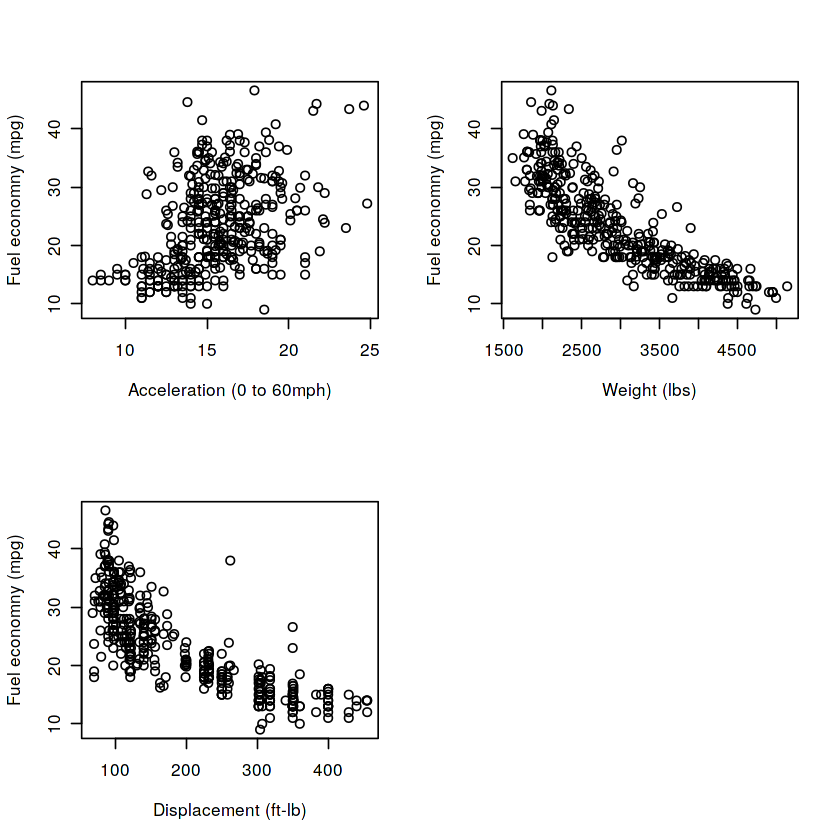

In [19]:
par(mfrow = c(2,2))
plot(Auto$acceleration, Auto$mpg, xlab = "Acceleration (0 to 60mph)", ylab = "Fuel economny (mpg)")
plot(Auto$weight, Auto$mpg, xlab = "Weight (lbs)", ylab = "Fuel economny (mpg)")
plot(Auto$displacement, Auto$mpg, xlab = "Displacement (ft-lb)", ylab = "Fuel economny (mpg)")

Creating a few more charts shows more correlations, the weakest of which being a cars acceleration compared to its fuel economy. We can still see however, that cars with the highest acceleration tend to be on the lower end of the mpg spectrum.

As a function of weight and displacement, cars tend to have worse fuel efficency as both of those parameters rose. The general takeaway being "larger cars less mpg"

### Part 6:

As we can see above, there is a negative correlation between horsepower and fuel economy as well as a tendency for vehicles with more cylinders to have higher horse power ranges. We can reasonably predict that a vehicle with more cylinders is going to have a lower fuel economy as a result.

Additionally, we can also assume that vehicles made in Japan and Europe will most likely have a higher fuel efficency than vehicles made in the U.S. based on the information seen in chart 1.

Additionally, our three subsequent charts show us that overall, larger cars (in terms of displacement and weight) tend to have a lower fuel economy than their smaller counterparts.

## 2.10

Initialize dataset

In [20]:
library(MASS)
head(Boston)
# Read about the boston dataset
?Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


There are 506 rows with 14 columns per row. The columns represent characteristics of a given town in the boston dataset and the rows represent a town.

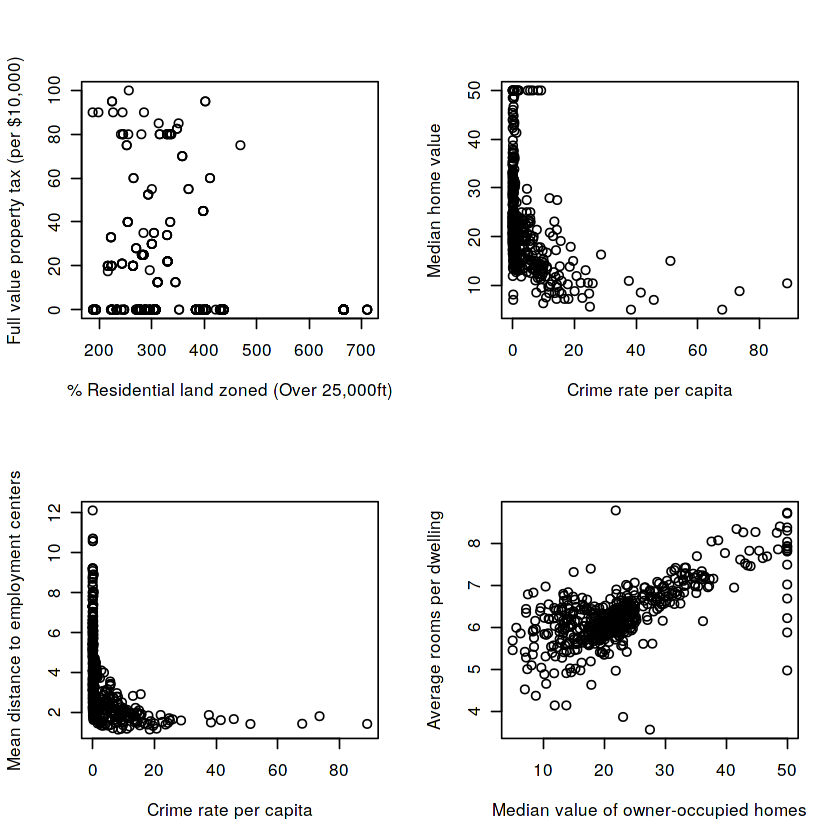

In [21]:
par(mfrow = c(2,2))
plot(Boston$tax, Boston$zn, xlab="% Residential land zoned (Over 25,000ft)", ylab="Full value property tax (per $10,000)")
plot(Boston$crim, Boston$medv, xlab="Crime rate per capita", ylab="Median home value")
plot(Boston$crim, Boston$dis, xlab="Crime rate per capita", ylab="Mean distance to employment centers")
plot(Boston$medv, Boston$rm, xlab="Median value of owner-occupied homes",, ylab="Average rooms per dwelling")

B.) Above we can see 4 charts, the first chart being Full value property tax rates relative to % of residential zoned areas. There seems to be no particular correlation between the two columns. The second being crime rate per capita compared to median home value, where there is a correlation of lower value homed areas having higher crime rates. Third is closeness to employment centers .vs. crime rate, where towns closer to employment centers tend to have higher crime rates. Finally, we have Median value of owner-occupied homes .vs. rooms per dwelling, where there is a strong correlation of higher room numbers to higher median values.

C.) In the above, we can see two predictors that are associated with the per-capita crime rate, one being the median home value, where lower home values tend to correlate with higher crime rates. The other being lower mean distances to employment centers, which also seems to correlate to higher crime rates.

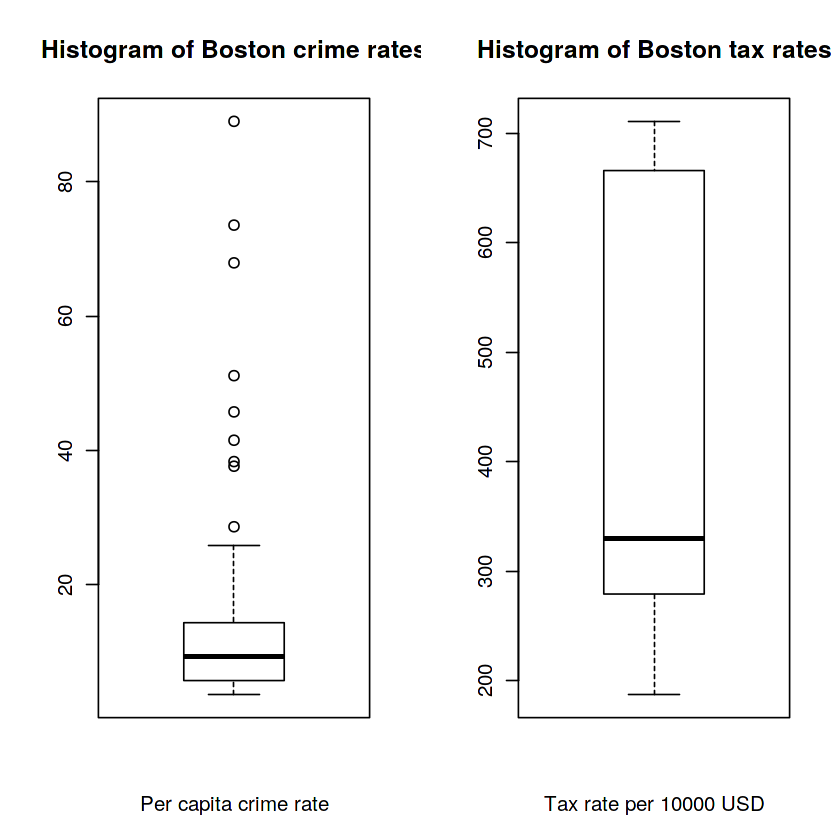

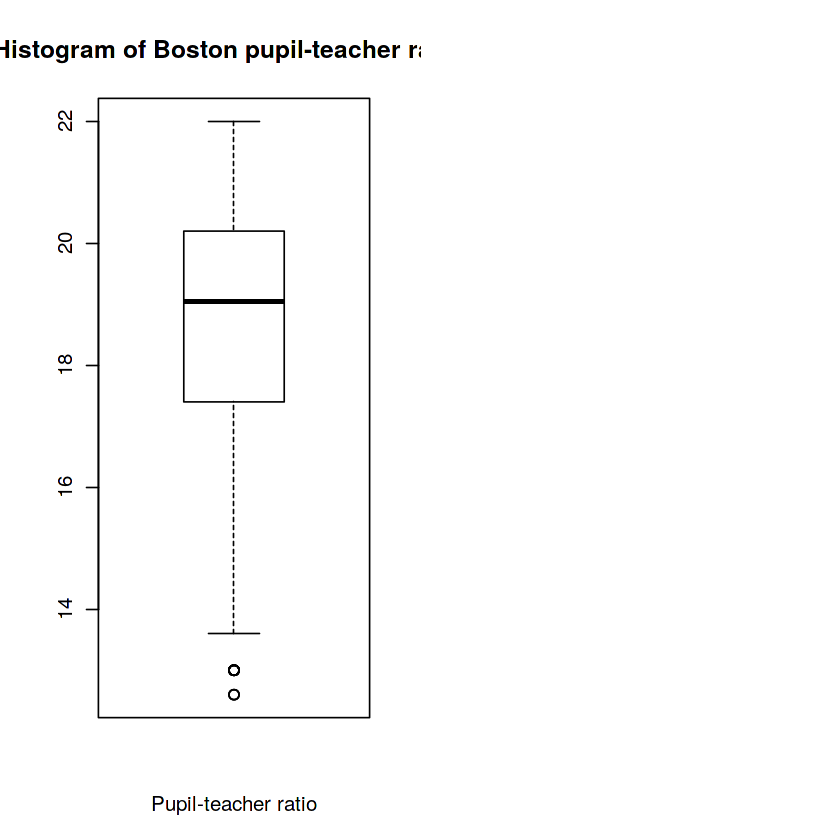

In [22]:
par(mfrow=c(1,2))
crimMean = mean(Boston$crim)
boxplot(Boston$crim[Boston$crim > crimMean], xlab = "Per capita crime rate", main = "Histogram of Boston crime rates")
boxplot(Boston$tax, xlab = "Tax rate per 10000 USD", main = "Histogram of Boston tax rates")
boxplot(Boston$ptratio, xlab = "Pupil-teacher ratio", main = "Histogram of Boston pupil-teacher ratios")

D.) We can see in the above bar charts, that even when adjusting for the mean which is well above the median value, there are still towns in the boston dataset that are well above the usual rate for crime. However in the charts for tax rates and ptratios, there does not seem to be such a high discrepency between the maximum data and the 75th percentile, nor are there any outliers above.

In [23]:
sum(Boston$chas)

[1] 35

E.) There are 35 towns which neighbor the Charles river

In [24]:
median(Boston$ptratio)

[1] 19.05

F.) The median ptratio is 19.05

In [25]:
min_mhome_value = min(Boston$medv)
Boston[Boston$medv == min_mhome_value, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


G.) The above code shows there are two towns that share the minimum  median value of owner-occupied homes.

In [26]:
Boston[Boston$rm > 7, ]
Boston[Boston$rm > 8, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
5,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
41,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
56,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
65,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
89,0.05660,0.0,3.41,0,0.4890,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
90,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
99,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,0.12083,0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
164,1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
205,0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.31533,0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
226,0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
227,0.38214,0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
233,0.57529,0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
234,0.33147,0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
254,0.36894,22,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8


h.) 64 towns average over 7 rooms per dwelling, 13 average over 8 rooms. Of the 8+ dwelling towns. The age of the individual buildings seems to be on the higher end and the distance seems to be overall closer to employment centers. Both of these statistics would indicate that the higher the number of average rooms/dwelling the closer it is to a large city.

## 3.8

Initialization

In [27]:
Auto = read.csv("../input/ISLR-Auto/Auto.csv", header = TRUE, na.strings = "?")
Auto = na.omit(Auto)
dim(Auto)

[1] 392   9

A.) Produce a scatterplot matrix which includes all pairs in the dataset.

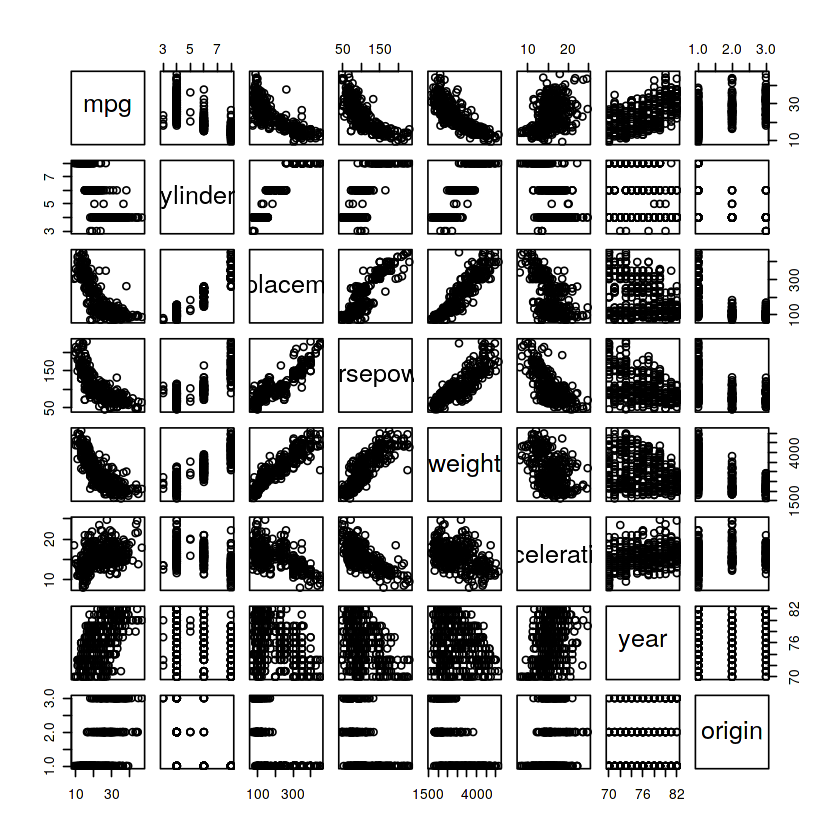

In [28]:
pairs(Auto[, -9])

B.) Compute matrix correlations

In [29]:
cor(Auto[,-9], Auto[, -9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


c.) Perform multiple linear regression with `mpg` as response to all other variables (except name).

    I. We have a high F-value of 252.4 which means that *at least one* predictor is statistically significant and a P-value which is practically 0, this indicates that there is a relationship between the predictors and the response value.
    II. The variables that seem to have a strong correlation to the predictor are displacement, weight, year, and origin, which all have p-values < 0.05, each of those also have a high absolute T value
    III. The coefficient of the year value seems to indicate that we can see a 0.75mpg increase year by year for vehicles. This is made relative to the other values being in the model, so in the presence of the other predictors, year is significant.

In [30]:
autoMpg = lm(mpg ~ . - name, data=Auto)
summary(autoMpg)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


D.) Using plot to show mpg fit, there is non-linearity in the fitted vs residules model which indicates that there are interactions present that are not significant to the model. In the standardized residuals .vs. fitted values plot, there are some residuals, namely the points outside of the (-3, 3) range which are most likely outliers.

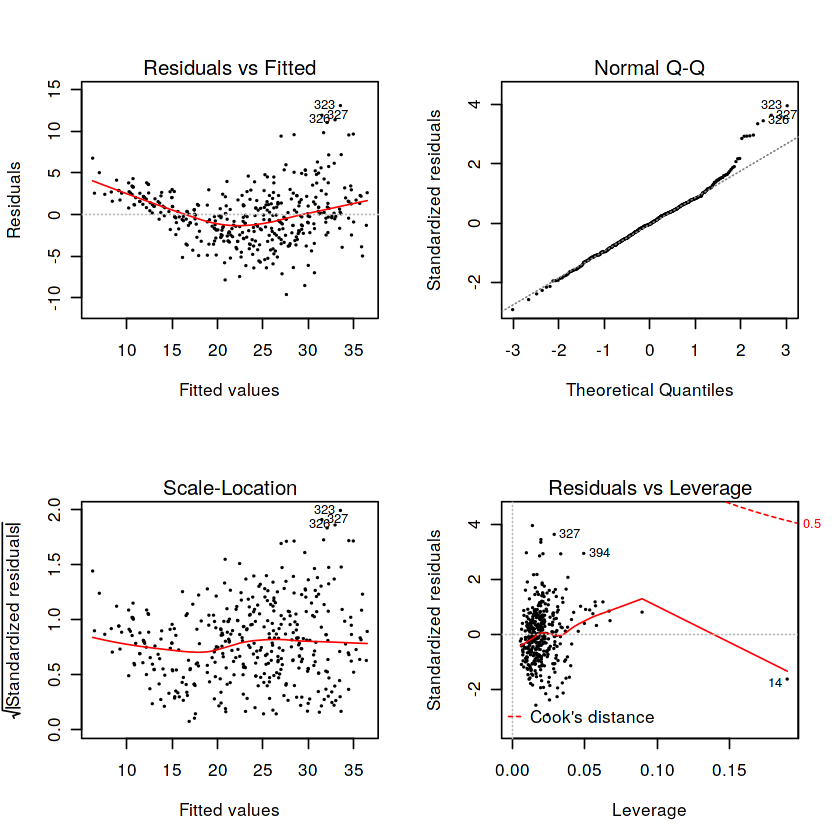

In [31]:
par(mfrow = c(2,2))
plot(lm(mpg ~ . - name, data=Auto), cex=0.1)

In [32]:
all.mpg.interactions = lm(mpg ~ (. -name)^2, data=Auto)
summary(all.mpg.interactions)


Call:
lm(formula = mpg ~ (. - name)^2, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight           3.575e-04  8.955e-04   0.399  0.69000   
cylinders:acceleration

E.) We are applying interaction effects between weight/acceleration and horsepower/displacement) in the following models. The first interaction between both are significant, however it does not seem to be particularly more than acceleration alone, but much more than weight alone.

In [33]:
weight.accel = lm(mpg~.-name + weight*acceleration, data=Auto)
horsepower.disp = lm(mpg~.-name + horsepower*displacement, data=Auto)
summary(weight.accel)
summary(horsepower.disp)


Call:
lm(formula = mpg ~ . - name + weight * acceleration, data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-8.247 -2.048 -0.045  1.619 12.193 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -4.364e+01  5.811e+00  -7.511 4.18e-13 ***
cylinders           -2.141e-01  3.078e-01  -0.696 0.487117    
displacement         3.138e-03  7.495e-03   0.419 0.675622    
horsepower          -4.141e-02  1.348e-02  -3.071 0.002287 ** 
weight               4.027e-03  1.636e-03   2.462 0.014268 *  
acceleration         1.629e+00  2.422e-01   6.726 6.36e-11 ***
year                 7.821e-01  4.833e-02  16.184  < 2e-16 ***
origin               1.033e+00  2.686e-01   3.846 0.000141 ***
weight:acceleration -5.826e-04  8.408e-05  -6.928 1.81e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.141 on 383 degrees of freedom
Multiple R-squared:  0.8414,	Adjusted R-squared:  0.838 
F-statistic: 253


Call:
lm(formula = mpg ~ . - name + horsepower * displacement, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7010 -1.6009 -0.0967  1.4119 12.6734 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.894e+00  4.302e+00  -0.440  0.66007    
cylinders                6.466e-01  3.017e-01   2.143  0.03275 *  
displacement            -7.487e-02  1.092e-02  -6.859 2.80e-11 ***
horsepower              -1.975e-01  2.052e-02  -9.624  < 2e-16 ***
weight                  -3.147e-03  6.475e-04  -4.861 1.71e-06 ***
acceleration            -2.131e-01  9.062e-02  -2.351  0.01921 *  
year                     7.379e-01  4.463e-02  16.534  < 2e-16 ***
origin                   6.891e-01  2.527e-01   2.727  0.00668 ** 
displacement:horsepower  5.236e-04  4.813e-05  10.878  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.912 on 383 degrees of freedom
Multiple R-squared:

F. ) The first transformation was taking the log of weight, which is much more significant than weight alone. Next was the sqrt of acceleration which seems to be a marginal change to acceleration alone. Finally we did a square transform on displacement which seemed to increase the significance.

In [34]:
summary(lm(mpg~.-name + log(weight), data=Auto))


Call:
lm(formula = mpg ~ . - name + log(weight), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6516 -1.6398 -0.1671  1.5973 12.7247 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  269.474171  31.136919   8.654  < 2e-16 ***
cylinders     -0.498204   0.292415  -1.704  0.08924 .  
displacement   0.013527   0.006832   1.980  0.04843 *  
horsepower    -0.022137   0.012483  -1.773  0.07696 .  
weight         0.007657   0.001631   4.694 3.73e-06 ***
acceleration   0.045763   0.089486   0.511  0.60936    
year           0.797808   0.046383  17.200  < 2e-16 ***
origin         0.719552   0.262819   2.738  0.00647 ** 
log(weight)  -41.320927   4.446725  -9.292  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.01 on 383 degrees of freedom
Multiple R-squared:  0.8543,	Adjusted R-squared:  0.8513 
F-statistic: 280.8 on 8 and 383 DF,  p-value: < 2.2e-16


In [35]:
summary(lm(mpg~.-name + sqrt(acceleration), data=Auto))


Call:
lm(formula = mpg ~ . - name + sqrt(acceleration), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8414 -1.9898 -0.0903  1.9205 13.1480 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.840e+01  1.715e+01   3.404 0.000733 ***
cylinders          -2.865e-01  3.185e-01  -0.900 0.368911    
displacement        8.116e-03  7.768e-03   1.045 0.296786    
horsepower         -3.469e-02  1.399e-02  -2.479 0.013599 *  
weight             -5.343e-03  6.823e-04  -7.830 4.82e-14 ***
acceleration        4.623e+00  9.986e-01   4.630 5.02e-06 ***
year                7.554e-01  4.971e-02  15.196  < 2e-16 ***
origin              1.327e+00  2.721e-01   4.876 1.59e-06 ***
sqrt(acceleration) -3.738e+01  8.178e+00  -4.570 6.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.245 on 383 degrees of freedom
Multiple R-squared:  0.8307,	Adjusted R-squared:  0.8272 
F-statistic: 234.9

In [36]:
summary(lm(mpg~.-name + I(displacement^2), data=Auto))


Call:
lm(formula = mpg ~ . - name + I(displacement^2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3584  -1.7222   0.0236   1.5766  11.9298 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.776e+00  4.271e+00  -2.289   0.0226 *  
cylinders          7.073e-01  3.191e-01   2.216   0.0273 *  
displacement      -1.041e-01  1.490e-02  -6.984 1.28e-11 ***
horsepower        -5.848e-02  1.323e-02  -4.421 1.28e-05 ***
weight            -4.231e-03  6.362e-04  -6.650 1.01e-10 ***
acceleration      -2.391e-02  9.001e-02  -0.266   0.7907    
year               7.622e-01  4.607e-02  16.544  < 2e-16 ***
origin             4.035e-01  2.741e-01   1.472   0.1419    
I(displacement^2)  2.077e-04  2.222e-05   9.345  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.007 on 383 degrees of freedom
Multiple R-squared:  0.8546,	Adjusted R-squared:  0.8516 
F-statistic: 281.4 

### Ch3.10

Initializing carseats datasetlibrary(ISLR)
head(Carseats)

In [37]:
library(ISLR)
head(Carseats)


Attaching package: ‘ISLR’


The following object is masked _by_ ‘.GlobalEnv’:

    Auto




,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


A.) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [38]:
carseats.fit = lm(Sales ~ Price + US + Urban, data=Carseats)
summary(carseats.fit)


Call:
lm(formula = Sales ~ Price + US + Urban, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
USYes        1.200573   0.259042   4.635 4.86e-06 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


B.) Both Price and Urban increases lead to a decrease in sales of carseats. For the first, for every $100 dollar increase in the price of carseats, we can see roughly 54.6 less units sold. In an urban setting, we can expect 21.9 less carseats sold per 100 carseats sold in a non-ubran setting. Finally, in the U.S. we see that there is a 120 higher sales than stores not in the U.S.

C.) cs.fit = B0 + B1 x Price + B2 x US + B3 x Urban + ei

D.) We can reject the null-hypothesis (H0 = 0) for both price and U.S based stores.

E.) Fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [39]:
carseats.fit2 = lm(Sales ~ Price + US, data=Carseats)
summary(carseats.fit)


Call:
lm(formula = Sales ~ Price + US + Urban, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
USYes        1.200573   0.259042   4.635 4.86e-06 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


F.) Both Models have low R^2 and adjusted R^2 values with slight deviations between the two. Model e however has a higher F-statistic with a similar P-Value which means it fits the data slightly better.

G.) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [40]:
confint(carseats.fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


H. ) Looking at the residuals .v. leverage chart below, there do not seem to be any outliers or high leverage observations in the chart. There aren't any observations outside of the -3,3 range.

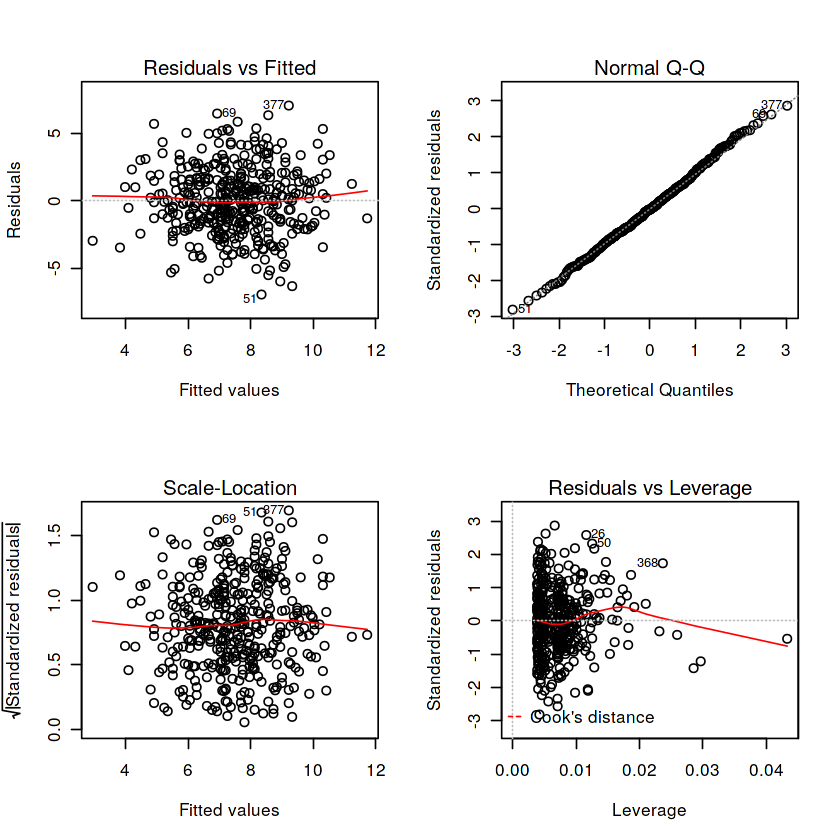

In [41]:
par(mfrow = c(2, 2))
plot(carseats.fit2)